In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Read in the data from the csv file
df_front = pd.read_csv('front_laser.csv')
df_front.drop(df_front.columns[0], axis=1, inplace=True)
df_right = pd.read_csv('right_laser.csv')
df_right.drop(df_right.columns[0], axis=1, inplace=True)
df_left = pd.read_csv('left_laser.csv')
df_left.drop(df_left.columns[0], axis=1, inplace=True)
df = [df_left, df_front, df_right]

In [42]:
# for every column in the dataframes, skipping the first, evaluate the mean and standard deviation
front_mean = np.mean(df_front.iloc[:,1:], axis=0)
front_std = np.std(df_front.iloc[:,1:], axis=0)
right_mean = np.mean(df_right.iloc[:,1:], axis=0)
right_std = np.std(df_right.iloc[:,1:], axis=0)
left_mean = np.mean(df_left.iloc[:,1:], axis=0)
left_std = np.std(df_left.iloc[:,1:], axis=0)

means = [[left_mean], [front_mean], [right_mean]]
stds = [[left_std], [front_std], [right_std]]

/tmp/ipykernel_69415/3936426472.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(laser_num)
/tmp/ipykernel_69415/3936426472.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(laser_num)
/tmp/ipykernel_69415/3936426472.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(laser_num)
/tmp/ipykernel_69415/3936426472.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(laser_num)
/tmp/ipykernel_69415/3936426472.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,2].set_xticklabels(laser_num)
/tmp/ipykernel_69415/3936426472.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(laser_num)


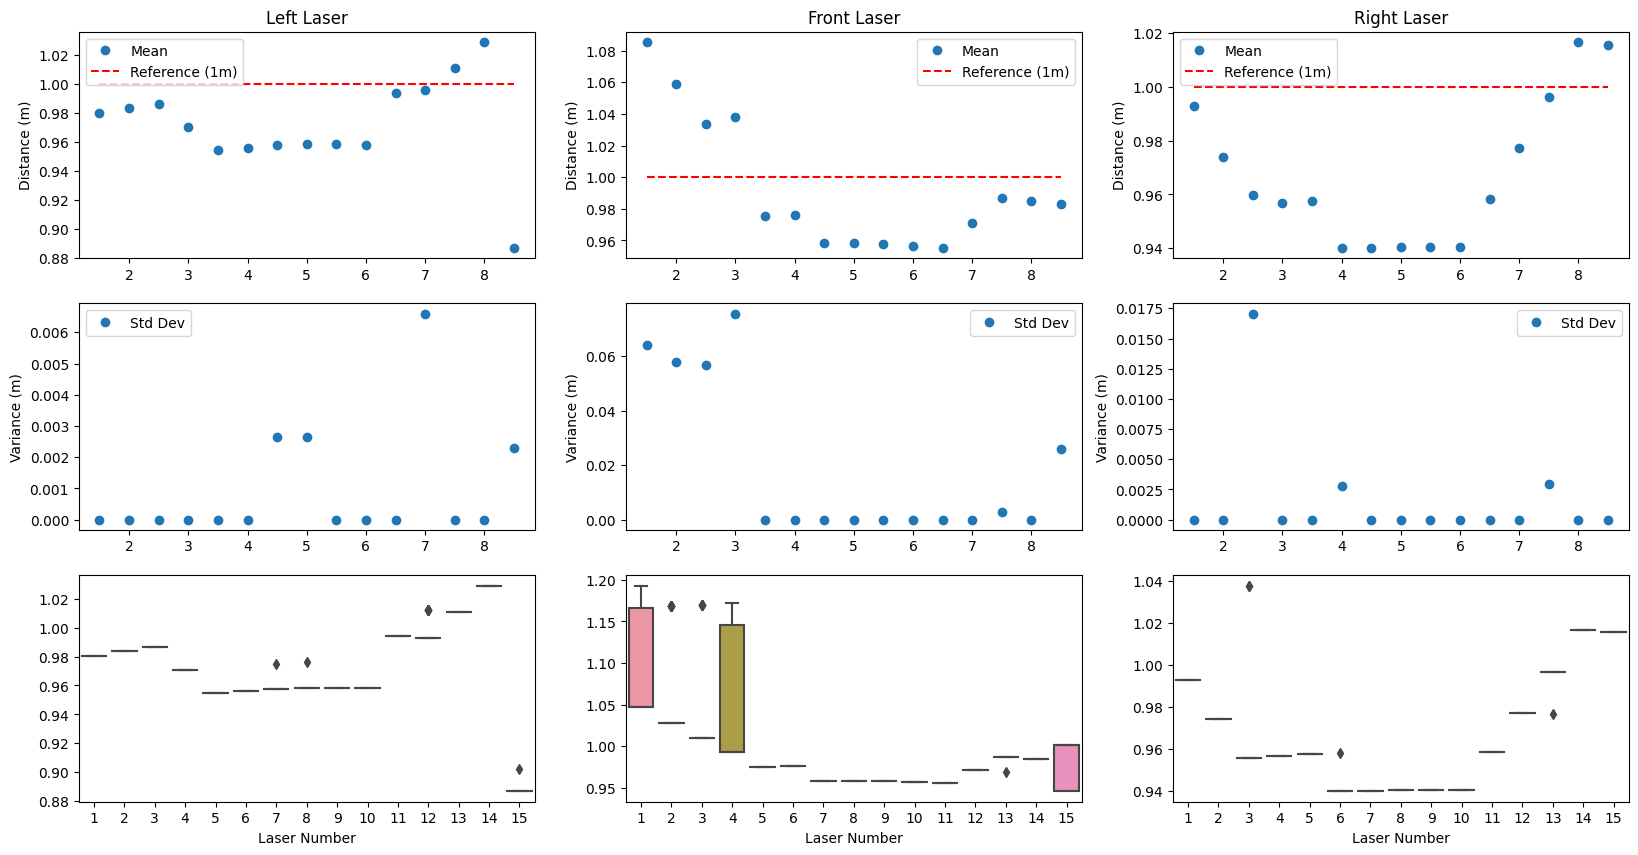

In [46]:
# generate the x-axis for the plot
laser_num = [i for i in range(1, 16)]

# get axis
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
ax[0,0].set_title('Left Laser')
ax[0,1].set_title('Front Laser')
ax[0,2].set_title('Right Laser')
ax[0,0].set_xticklabels(laser_num)
ax[1,0].set_xticklabels(laser_num)
ax[0,1].set_xticklabels(laser_num)
ax[1,1].set_xticklabels(laser_num)
ax[0,2].set_xticklabels(laser_num)
ax[1,2].set_xticklabels(laser_num)
for i in range(0,3):
    ax[0,i].set_ylabel('Distance (m)')
    ax[1,i].set_ylabel('Variance (m)')
    ax[0,i].plot(laser_num, means[i][0], 'o')
    ax[0,i].hlines(1, 1, 15, colors='r', linestyles='dashed')
    ax[0,i].legend(['Mean', 'Reference (1m)'])
    ax[1,i].plot(laser_num, stds[i][0], 'o')
    ax[1,i].legend(['Std Dev'])
    sns.boxplot(ax=ax[2,i], data=df[i].iloc[:,1:])
    ax[2,i].set_xlabel('Laser Number')
plt.show()

In [55]:
# compute the absolute error for each laser
left_abs_err = 1/2*(np.max(df_left.iloc[:,1:], axis=0) - np.min(df_left.iloc[:,1:], axis=0))
front_abs_err = 1/2*(np.max(df_front.iloc[:,1:], axis=0) - np.min(df_front.iloc[:,1:], axis=0))
right_abs_err = 1/2*(np.max(df_right.iloc[:,1:], axis=0) - np.min(df_right.iloc[:,1:], axis=0))

# compute the relative error for each laser
left_rel_err = left_abs_err/left_mean
front_rel_err = front_abs_err/front_mean
right_rel_err = right_abs_err/right_mean

for i in range(0,15):
      print(f"Laser Range {i+1} \n"+
      f"\t Absolute \t\tRelative \t\tPerc.\n"+
      f"Left \t{left_abs_err[i]:.4f} \t\t{left_rel_err[i]:.4f} \t\t{left_rel_err[i]*100:.4f}%\n" +
      f"Front \t{front_abs_err[i]:.4f} \t\t{front_rel_err[i]:.4f} \t\t{front_rel_err[i]*100:.4f}%\n" +
      f"Right \t{right_abs_err[i]:.4f} \t\t{right_rel_err[i]:.4f} \t\t{right_rel_err[i]*100:.4f}%\n")

Laser Range 1 
	 Absolute 		Relative 		Perc.
Left 	0.0000 		0.0000 		0.0000%
Front 	0.0732 		0.0675 		6.7458%
Right 	0.0000 		0.0000 		0.0000%

Laser Range 2 
	 Absolute 		Relative 		Perc.
Left 	0.0000 		0.0000 		0.0000%
Front 	0.0700 		0.0661 		6.6098%
Right 	0.0000 		0.0000 		0.0000%

Laser Range 3 
	 Absolute 		Relative 		Perc.
Left 	0.0000 		0.0000 		0.0000%
Front 	0.0800 		0.0774 		7.7408%
Right 	0.0409 		0.0427 		4.2651%

Laser Range 4 
	 Absolute 		Relative 		Perc.
Left 	0.0000 		0.0000 		0.0000%
Front 	0.0896 		0.0863 		8.6340%
Right 	0.0000 		0.0000 		0.0000%

Laser Range 5 
	 Absolute 		Relative 		Perc.
Left 	0.0000 		0.0000 		0.0000%
Front 	0.0000 		0.0000 		0.0000%
Right 	0.0000 		0.0000 		0.0000%

Laser Range 6 
	 Absolute 		Relative 		Perc.
Left 	0.0000 		0.0000 		0.0000%
Front 	0.0000 		0.0000 		0.0000%
Right 	0.0092 		0.0098 		0.9823%

Laser Range 7 
	 Absolute 		Relative 		Perc.
Left 	0.0089 		0.0093 		0.9273%
Front 	0.0000 		0.0000 		0.0000%
Right 	0.0000 		0.0000 		0